# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Евклидова норма разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [78]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [80]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [81]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [82]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [83]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [84]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [85]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: 
* **StochasticDescent**:
* **MomentumDescent**:
* **Adagrad**:
* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [365]:
import pandas as pd

In [366]:
df = pd.read_csv('autos.csv')

In [367]:
df

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,bmw,3er,kombi,manuell,diesel,nein,3,150000,2005,5,2016-04-02 00:00:00,2016-04-06 20:47:12,81825,3999
247868,seat,leon,limousine,manuell,benzin,ja,225,150000,2004,5,2016-03-19 00:00:00,2016-03-19 20:44:43,96465,3200
247869,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,2000,3,2016-03-05 00:00:00,2016-03-11 18:17:12,26135,1199
247870,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,1996,3,2016-03-19 00:00:00,2016-04-07 07:15:26,87439,9200


Пропусков в данных нет, это очень хорошо:

In [368]:
print(df.isna().sum().sort_values(ascending = False))

price                  0
postalCode             0
lastSeen               0
dateCreated            0
monthOfRegistration    0
yearOfRegistration     0
kilometer              0
powerPS                0
notRepairedDamage      0
fuelType               0
gearbox                0
vehicleType            0
model                  0
brand                  0
dtype: int64


In [369]:
df["price"] = np.log1p(df["price"])

Заменим тот столбец на бинарный, чтобы в будущем уже не трансформировать его:

In [370]:
df.notRepairedDamage.value_counts()

nein    223265
ja       24607
Name: notRepairedDamage, dtype: int64

In [371]:
df["notRepairedDamage"] = np.where((df["notRepairedDamage"] == "nein"), 1, 0)

In [372]:
df.gearbox.value_counts()

manuell      189572
automatik     58300
Name: gearbox, dtype: int64

In [373]:
df["gearbox"] = np.where((df["gearbox"] == "manuell"), 1, 0)

Добавили колонку с 1, чтобы учитывался свободный признак в регрессии:

In [374]:
df["ones"] = 1

Проведём обработку времени:

In [375]:
df.dateCreated = pd.to_datetime(df["dateCreated"])

Видим, что время везде одинаковое, год почти тоже везде одинаковый, 2015 - является очень редкой категорией, не будет использовать её в обучении.

In [376]:
df.dateCreated.dt.year.value_counts()

2016    247848
2015        24
Name: dateCreated, dtype: int64

In [377]:
df.dateCreated.dt.time.value_counts()

00:00:00    247872
Name: dateCreated, dtype: int64

In [378]:
df["month_created"] = df.dateCreated.dt.month

In [379]:
df["month_created"].value_counts()

3     206800
4      40732
2        272
1         45
12         9
11         8
9          3
8          2
10         1
Name: month_created, dtype: int64

Видим, что есть редкие категории - месяцы с августа по январь, предлагаю их объединить в одну категорию "объявление сделано в конце года".

In [380]:
df.loc[df["month_created"] >= 5, "month_created"] = 1

Посмотрим теперь на другой столбец с датами:

In [381]:
df["lastSeen"] = pd.to_datetime(df["lastSeen"])

Год везде одинаковый, он не даёт никакой дополнительной информации. Не будем использовать его в обучении.

In [382]:
df["lastSeen"].dt.year.value_counts()

2016    247872
Name: lastSeen, dtype: int64

Всего два месяца и на тестовой выборке тоже только такие будут, поэтому переведём их сразу в 1 и 0.

In [383]:
df["lastSeen"].dt.month.value_counts()

4    148637
3     99235
Name: lastSeen, dtype: int64

In [384]:
df["lastSeen_month"] = np.where((df["lastSeen"].dt.month == 4), 1, 0)

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

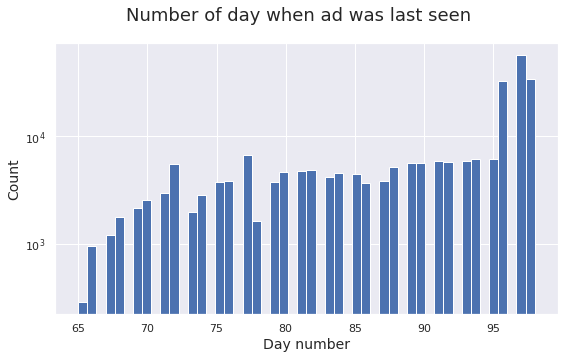

In [386]:
plt.figure(figsize=(9, 5))
plt.hist(df["lastSeen"].dt.dayofyear, bins=50, log=True)
plt.suptitle("Number of day when ad was last seen", fontsize=18)
plt.xlabel("Day number", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [387]:
df["lastSeen_day"] = df["lastSeen"].dt.dayofyear

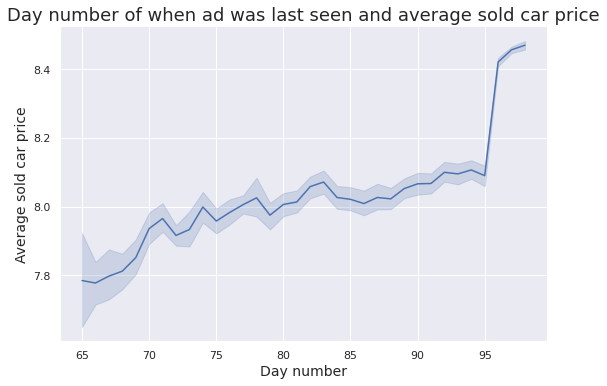

In [388]:
fig = sns.relplot(
    x=df["lastSeen"].dt.dayofyear,
    y=df.price,
    kind="line",
    height=5,
    aspect=1.5,
)
plt.title("Day number of when ad was last seen and average sold car price", fontsize=18)
plt.xlabel("Day number", fontsize=14)
plt.ylabel("Average sold car price", fontsize=14)
plt.show()

В общем, смотря на эти графики, я предлагаю нам всем взять номер дня в качестве числого признака, потому что видно, что ближе к "последним" дням было больше последних показов рекламы и средняя цена на продажу машин тоже была больше.

In [389]:
print(df.yearOfRegistration.max())
print(df.yearOfRegistration.min())

2016
1910


Тут всё корректно, год регистраций реальный, нет никаких машин из будущего или машин из слишком старых времён, когда машин ещё не существовало.

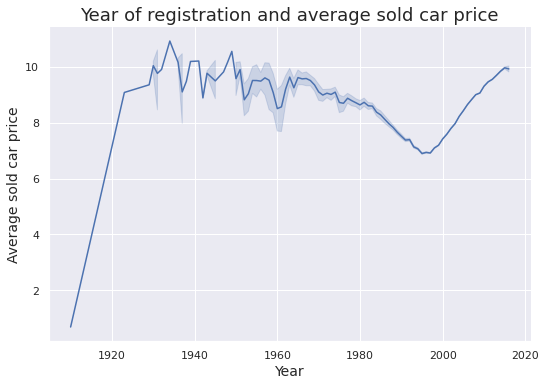

In [390]:
fig = sns.relplot(
    x=df["yearOfRegistration"],
    y=df.price,
    kind="line",
    height=5,
    aspect=1.5,
)
plt.title("Year of registration and average sold car price", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average sold car price", fontsize=14)
plt.show()

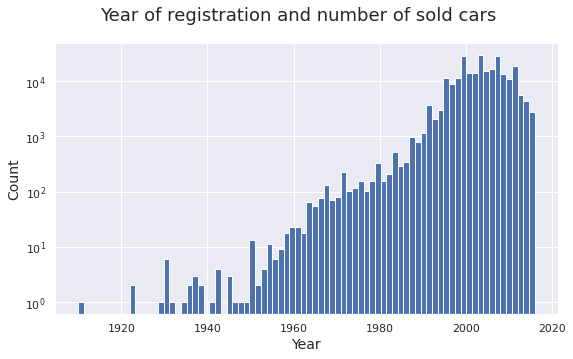

In [391]:
plt.figure(figsize=(9, 5))
plt.hist(df["yearOfRegistration"], bins=80, log=True)
plt.suptitle("Year of registration and number of sold cars", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [392]:
len(df.loc[df["yearOfRegistration"] <= 1995])

19644

Я предлагаю разбить год регистраций на 2 столбца: в одном оставить годы до 1995 (и занулить другие), а в другом после. Думаю, что результат будет лучше, потому что мы видим, что после 1995 цена возрастает, а до него она колеблеться. Поэтому пусть будет отдельный вес для каждого столбца.

In [393]:
df.loc[df["yearOfRegistration"] > 1995, "new_year"] = df["yearOfRegistration"]

In [394]:
df.loc[df["yearOfRegistration"] <= 1995, "old_year"] = df["yearOfRegistration"]

In [395]:
df.old_year.fillna(0, inplace=True)
df.new_year.fillna(0, inplace=True)

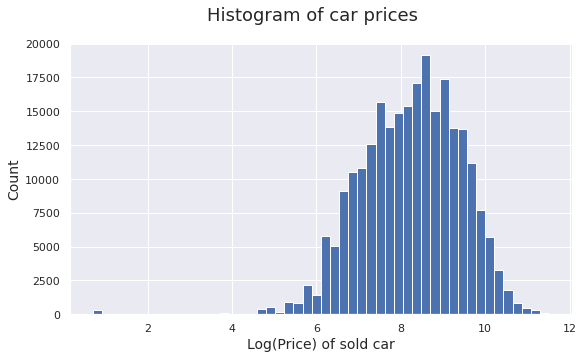

In [396]:
plt.figure(figsize=(9, 5))
plt.hist(df["price"], bins=50)
plt.suptitle("Histogram of car prices", fontsize=18)
plt.xlabel("Log(Price) of sold car", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Распределение похоже на нормальное, поэтому удалять не будем данные. Удалим только совсем с маленькой ценой.

In [397]:
df = df[df.price > 4]

In [398]:
df = df.drop("yearOfRegistration", 1)

In [399]:
df = df.drop("dateCreated", 1)
df = df.drop("lastSeen", 1)

Остальные данные про время и номер дней не давал какую-то конкретную зависимость, поэтому сотрём их.

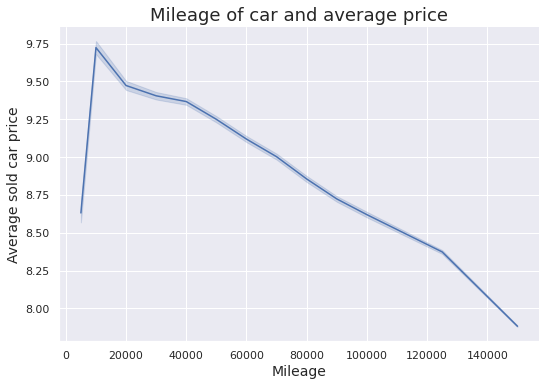

In [400]:
fig = sns.relplot(
    x=df.kilometer,
    y=df.price,
    kind="line",
    height=5,
    aspect=1.5,
)
plt.title("Mileage of car and average price", fontsize=18)
plt.xlabel("Mileage", fontsize=14)
plt.ylabel("Average sold car price", fontsize=14)
plt.show()

Видим, что есть некая зависимость, будем использовать в качестве числого признака.

In [401]:
df["log_kilometer"] = np.log1p(df["kilometer"])

<ipython-input-402-140774b85106>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


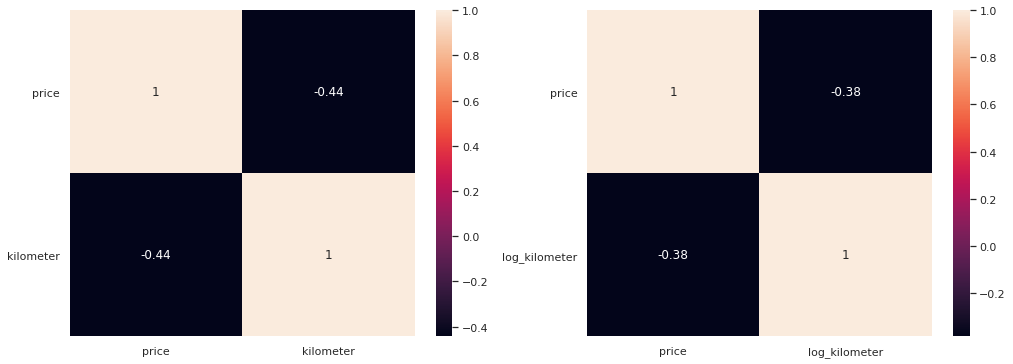

In [402]:
fig, ax = plt.subplots(1, 2, figsize=(17,6))
g = sns.heatmap(df[["price", "kilometer"]].corr(), annot=True, ax=ax[0])
g.set_yticklabels(g.get_xticklabels(), rotation=0)
g = sns.heatmap(df[["price", "log_kilometer"]].corr(), annot=True, ax=ax[1])
g.set_yticklabels(g.get_xticklabels(), rotation=0)
fig.show()

Видим, что корреляция у обычных километров (пробега) больше с ценой, чем у их логарифма, поэтому будем использовать обычные.

In [403]:
df = df.drop("log_kilometer", 1)

In [404]:
df = df.drop("postalCode", 1)

In [405]:
df

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,monthOfRegistration,price,ones,month_created,lastSeen_month,lastSeen_day,new_year,old_year
0,volkswagen,golf,kleinwagen,1,benzin,1,75,150000,6,7.313887,1,3,0,77,2001.0,0.0
1,skoda,fabia,kleinwagen,1,diesel,1,69,90000,7,8.188967,1,3,1,97,2008.0,0.0
2,bmw,3er,limousine,1,benzin,0,102,150000,10,6.478510,1,4,1,97,0.0,1995.0
3,peugeot,2_reihe,cabrio,1,benzin,1,109,150000,8,7.696667,1,4,1,96,2004.0,0.0
4,mazda,3_reihe,limousine,1,benzin,1,105,150000,12,7.601402,1,3,1,97,2004.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,bmw,3er,kombi,1,diesel,1,3,150000,5,8.294050,1,4,1,97,2005.0,0.0
247868,seat,leon,limousine,1,benzin,0,225,150000,5,8.071219,1,3,0,79,2004.0,0.0
247869,smart,fortwo,cabrio,0,benzin,1,101,125000,3,7.090077,1,3,0,71,2000.0,0.0
247870,volkswagen,transporter,bus,1,diesel,1,102,150000,3,9.127067,1,3,1,98,1996.0,0.0


Трансформер для будущего обучения:

In [406]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

categorical = [
    "brand",
    "model",
    "vehicleType",
    "fuelType",
    "month_created",
    "monthOfRegistration"
]
numeric_features = ["kilometer", "new_year", "old_year", "lastSeen_day", "powerPS"]
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [407]:
best_lambdas = []

Преобразуем колонки, чтобы можно было работать с регрессией:

In [408]:
from sklearn.metrics import mean_squared_error

In [409]:
from sklearn.model_selection import train_test_split

y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [410]:
X_train = column_transformer.fit_transform(X_train).toarray()
X_test = column_transformer.transform(X_test).toarray()

Видим, что вышло 326 признаков:

In [411]:
X_train.shape

(197977, 326)

Теперь разделим трейн на трейн и валид, как просили выше, чтобы проверять качество найденных гиперпараметров:

In [412]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [432]:
lambdas = np.logspace(-3, 0.5, 15)

In [433]:
results = []
for lambda_ in lambdas:
    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
        descent=GradientDescent(lambda_=lambda_, w0=w0)
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_valid)
    results.append(mean_squared_error(y_pred, y_valid.values, squared=True))

In [434]:
print(results)

[68.83902682561289, 67.93473716731806, 64.83885180680365, 56.47909942679381, 39.312382898776505, 20.177570609668646, 8.372034700003642, 3.7952419784117293, 2.3038253875295975, 1.5598462842912573, 1.0205427355586159, 0.7537605221063639, 0.6320120895182055, 0.535942236588168, 0.46862146216090744]


Text(0, 0.5, 'MSE on valid')

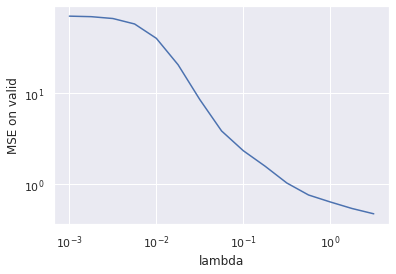

In [435]:
plt.plot(lambdas, results)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("lambda")
plt.ylabel("MSE on valid")

In [436]:
best_lambdas.append(lambdas[np.argmin(results)])

In [437]:
lambdas = np.logspace(-4, -0.4, 20)

In [438]:
results = []
for lambda_ in lambdas:
    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
        descent=StochasticDescent(lambda_=lambda_, w0=w0)
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_valid)
    results.append(mean_squared_error(y_pred, y_valid.values, squared=True))

Text(0, 0.5, 'MSE on valid')

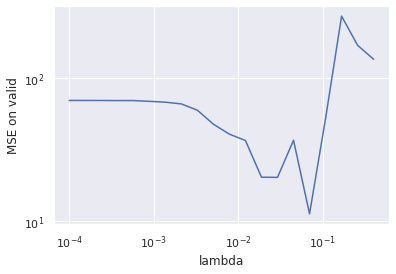

In [439]:
plt.plot(lambdas, results)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("lambda")
plt.ylabel("MSE on valid")

In [440]:
best_lambdas.append(lambdas[np.argmin(results)])

In [424]:
lambdas = np.logspace(-4, 0.5, 15)
results = []
for lambda_ in lambdas:
    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
        descent=MomentumDescent(lambda_=lambda_, w0=w0)
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_valid)
    results.append(mean_squared_error(y_pred, y_valid.values, squared=True))

Text(0, 0.5, 'MSE on valid')

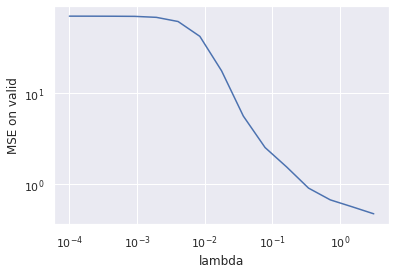

In [425]:
plt.plot(lambdas, results)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("lambda")
plt.ylabel("MSE on valid")

In [426]:
best_lambdas.append(lambdas[np.argmin(results)])

In [427]:
lambdas = np.logspace(-4, 0.5, 15)
results = []
for lambda_ in lambdas:
    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
        descent=Adagrad(lambda_=lambda_, w0=w0)
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_valid)
    results.append(mean_squared_error(y_pred, y_valid.values, squared=True))

Text(0, 0.5, 'MSE on valid')

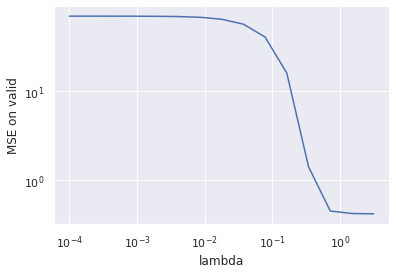

In [428]:
plt.plot(lambdas, results)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("lambda")
plt.ylabel("MSE on valid")

In [429]:
best_lambdas.append(lambdas[np.argmin(results)])

In [451]:
best_lambdas

[1.7782794100389228,
 0.044939845907216704,
 3.1622776601683795,
 3.1622776601683795]

Соединим обратно валидационную выборку и трейн, чтобы обучать на них:

In [452]:
y_train = np.concatenate([y_train, y_valid])

In [453]:
X_train = np.concatenate([X_train, X_valid])

Начнём исследование:

In [454]:
from sklearn.metrics import r2_score

In [455]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(descent=GradientDescent(lambda_=best_lambdas[0], w0=w0))
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
full_history = regression.loss_history

Train MSE = 0.5347
Test MSE = 0.5356
Train R^2 = 0.5857
Test R^2 = 0.5878
Number of iterations: 33


In [456]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(descent=StochasticDescent(lambda_=best_lambdas[1], w0=w0))
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
chaos_history = regression.loss_history

Train MSE = 5.7407
Test MSE = 5.7747
Train R^2 = -3.4486
Test R^2 = -3.4435
Number of iterations: 27


In [457]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(descent=MomentumDescent(lambda_=best_lambdas[2], w0=w0))
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
moment_history = regression.loss_history

Train MSE = 0.4718
Test MSE = 0.4734
Train R^2 = 0.6344
Test R^2 = 0.6357
Number of iterations: 75


In [458]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(descent=Adagrad(lambda_=best_lambdas[3], w0=w0))
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
adagrad_history = regression.loss_history

Train MSE = 0.4166
Test MSE = 0.4176
Train R^2 = 0.6772
Test R^2 = 0.6786
Number of iterations: 69


Что же, посмотрели на результаты, сравнили. Видим, что неплохой результат по качеству показывает полный градиент. Стохастический показал не особо хороший результат, хотя там зависит от лямбды и случайно выбранного объекта, например, когда мы подбирали лямбду, было видно, что качество колебалось на соседних альфах, думаю, что выпадали более и менее удачные объекты. Хорошо себя показал моментум и адаград, у них лучший результат на обучении.

Дополним списки потерь по итерациям до самого большого количества итераций среди методов, чтобы лучше смотрелся график. Дополняем последними величинами, так как изменение весов на следующих итерациях было бы незначительным.

In [459]:
max_history = max(
    len(adagrad_history), len(full_history), len(chaos_history), len(moment_history)
)
full_history += (max_history - len(full_history)) * [full_history[-1]]
chaos_history += (max_history - len(chaos_history)) * [chaos_history[-1]]
moment_history += (max_history - len(moment_history)) * [moment_history[-1]]

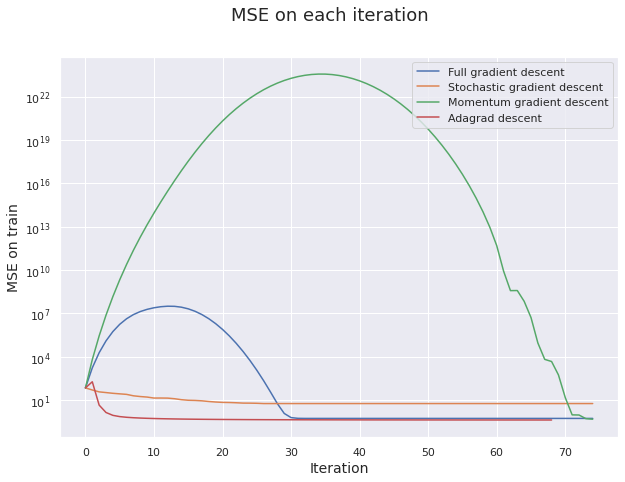

In [460]:
plt.figure(figsize=(10, 7))
plt.suptitle("MSE on each iteration", fontsize=18)
plt.plot(full_history, label="Full gradient descent")
plt.plot(chaos_history, label="Stochastic gradient descent")
plt.plot(moment_history, label="Momentum gradient descent")
plt.plot(adagrad_history, label="Adagrad descent")
plt.yscale("log")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("MSE on train", fontsize=14)
plt.legend(loc="upper right")
plt.show()

Посмотрели. Очень любопытный результат, можно увидеть, как постепенно увеличивается ошибка, а потом уменьшается, то есть градиент вначале, возможно, перепрыгивает нужную точку или отклоняется от верного направления, а потом постепенно приближается к ней. Видим, что это сильнее всего происходит на полном градиенте и на моментуме. Возможно, в моментуме это так отражается, так как инерция вначале его тянет немного не в ту сторону, а потом уже, когда он делает несколько шагов, то инерция тянет его к оптимальной точке.

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [465]:
from collections import deque
from timeit import default_timer as timer

Немного изменим размер батчей, так как у меня меньше 500 признаков, сделаем их более релевантными:

In [470]:
batch_sizes = np.arange(5, 320, 10)

In [471]:
batch_sizes

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315])

k возьмём не очень большое, потому что иначе на моём ПК миллиарды лет это работает, не доживу до результата просто:

In [472]:
iterations_total = deque([])
times_total = deque([])

for batch in batch_sizes:
    iterations = []
    times = []
    for k in range(0, 4):
        w0 = np.zeros(X_train.shape[1])
        start = timer()
        regression = LinearRegression(
            descent=StochasticDescent(batch_size=batch, lambda_=best_lambdas[1], w0=w0)
        )
        regression.fit(X_train, y_train)
        end = timer()
        iterations.append(len(regression.loss_history))
        times.append(end - start)
    iterations_total.append(iterations)
    times_total.append(times)

In [473]:
iterations_total = np.array(iterations_total)
times_total = np.array(times_total)

Теперь найдём среднее и дисперсию, посмотрим, как они выглядят на графике:

In [476]:
iterations_mean = iterations_total.mean(axis=1)
times_mean = times_total.mean(axis=1)

In [481]:
iterations_var = iterations_total.var(axis=1)
times_var = times_total.var(axis=1)

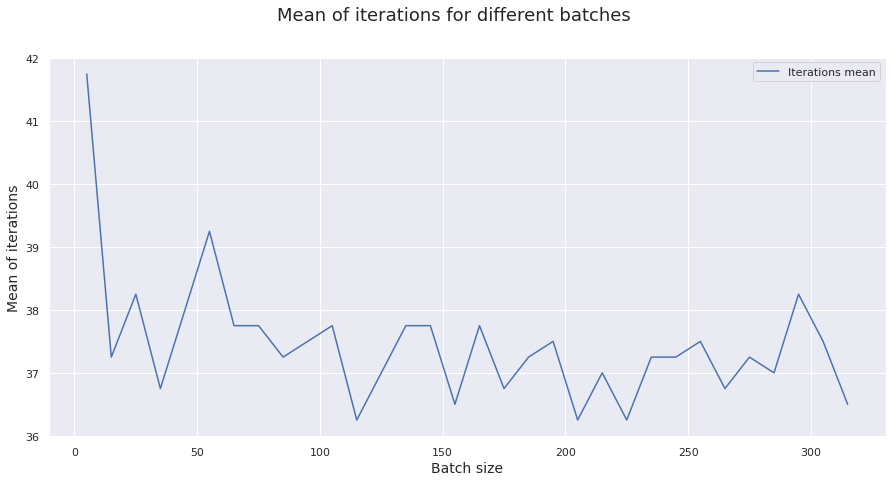

In [491]:
plt.figure(figsize=(15, 7))
plt.suptitle("Mean of iterations for different batches", fontsize=18)
plt.plot(batch_sizes, iterations_mean, label="Iterations mean")
plt.xlabel("Batch size", fontsize=14)
plt.ylabel("Mean of iterations", fontsize=14)
plt.legend(loc="upper right")
plt.show()

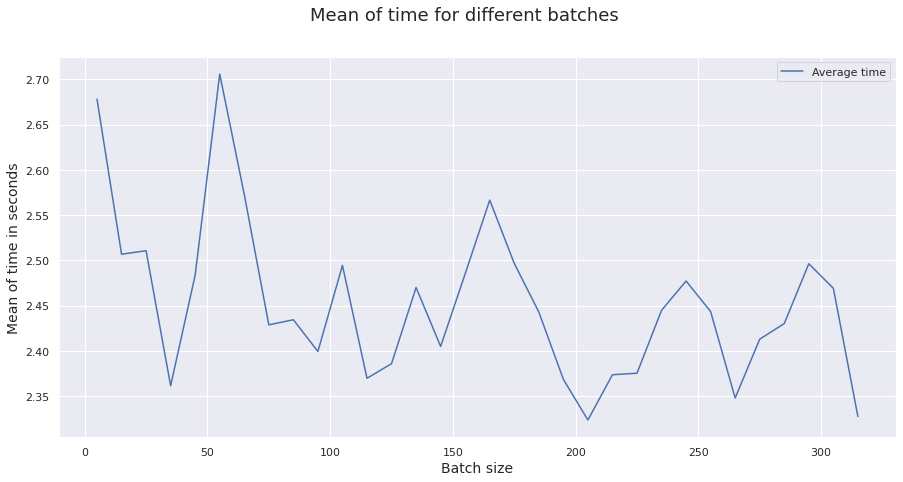

In [493]:
plt.figure(figsize=(15, 7))
plt.suptitle("Mean of time for different batches", fontsize=18)
plt.plot(batch_sizes, times_mean, label="Average time")
plt.xlabel("Batch size", fontsize=14)
plt.ylabel("Mean of time in seconds", fontsize=14)
plt.legend(loc="upper right")
plt.show()

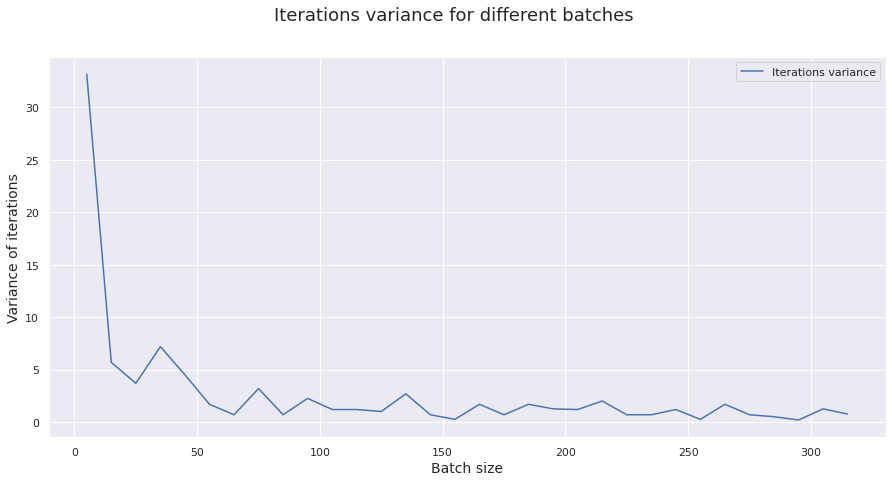

In [502]:
plt.figure(figsize=(15, 7))
plt.suptitle("Iterations variance for different batches", fontsize=18)
plt.plot(batch_sizes, iterations_var, label="Iterations variance")
#plt.yscale("log")
plt.xlabel("Batch size", fontsize=14)
plt.ylabel("Variance of iterations", fontsize=14)
plt.legend(loc="upper right")
plt.show()

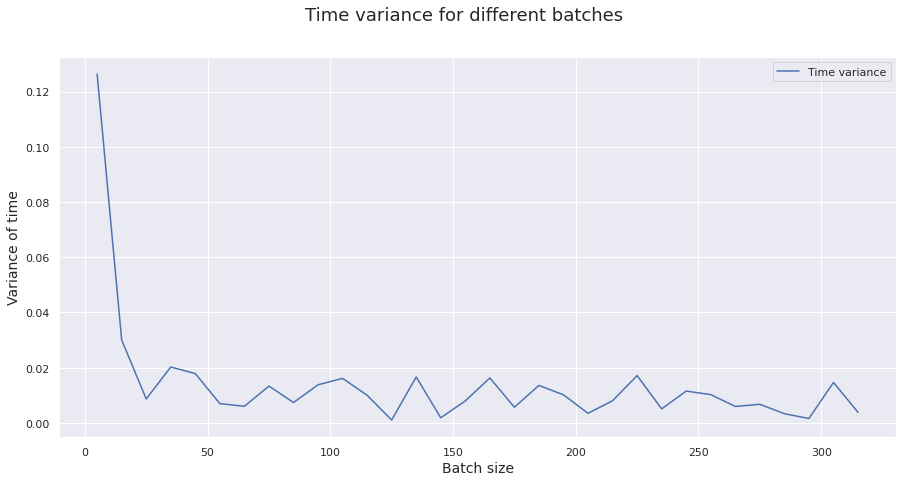

In [501]:
plt.figure(figsize=(15, 7))
plt.suptitle("Time variance for different batches", fontsize=18)
plt.plot(batch_sizes, times_var, label="Time variance")
#plt.yscale("log")
plt.xlabel("Batch size", fontsize=14)
plt.ylabel("Variance of time", fontsize=14)
plt.legend(loc="upper right")
plt.show()

Посмотрели на результаты и эти графики. Видим, что, чем больше размер батча, тем быстрее сходимость, то есть меньше итераций требуется. Из-за того, что требуется меньше итераций, требуется меньше времени на сходимость. Однако, для больших батчей иногда требуется больше времени, потому что дольше считать градиент.

Также, мы видим, что для больших батчей меньше дисперсия по итерациям и времени. Можно сделать вывод, что стохастика сильнее влияет на результаты градиента, когда батч небольшой, если же же батч примерно больше 50, количество итераций и потраченное время будет примерно одинаковым. Это логично, ведь тогда на каждой итерации выбирается больше признаков и больше вероятность, что в течение разных спусков выпадут примерно одинаковые объекты, а значит и результат будет примерно одинаковым. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [504]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

Опять разделим трейн на трейн и валид:

In [565]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

Начнём искать лямбды:

In [566]:
best_reg_lambdas = []
best_mu = []

***Примечание***: вначале я протестировал все эти методы с разными лямбдами, но не менял мю (использовалась дефолтная), качество ухудшилось. Это означает, что нужно подобрать мю меньше, чтобы штрафы были не такими сильными и модель могла подобрать веса лучше. Также у меня слишком долго происходит обучение, поэтому мы уменьшим перебор, будем сразу перебирать потенциально оптимальные гиперпараметры (будем ориентироваться на прежние интервалы лямбд).

In [590]:
lambdas = np.logspace(-1, -0.3, 4)
mu = np.logspace(-4, -2, 3)
results = []
for lambda_ in lambdas:
    temp_res = []
    for mu_ in mu:
        w0 = np.zeros(X_train.shape[1])
        regression = LinearRegression(
            descent=GradientDescentReg(mu=mu_, lambda_=lambda_, w0=w0)
        )
        regression.fit(X_train, y_train)
        y_pred = regression.predict(X_valid)
        temp_res.append(mean_squared_error(y_pred, y_valid, squared=True))
    results.append(temp_res)
results

[[2.3255267521355476, 2.3329725931328773, 2.3647475305133185],
 [1.6130735212579683, 1.6198389441863428, 1.6217021735112036],
 [1.0817199138836677, 1.0896551935831325, 1.0080031103689306],
 [0.7923239164055685, 0.8005341007504813, 1.967129466149547]]

Видим, что при меньшей мю результат лучше. Давайте тогда возьмём лямбду больше, а мю ещё меньше:

In [610]:
lambdas = np.logspace(-0.3, 0.3, 4)
mu = np.logspace(-6, -4, 3)
results = []
for lambda_ in lambdas:
    temp_res = []
    for mu_ in mu:
        w0 = np.zeros(X_train.shape[1])
        regression = LinearRegression(
            descent=GradientDescentReg(mu=mu_, lambda_=lambda_, w0=w0)
        )
        regression.fit(X_train, y_train)
        y_pred = regression.predict(X_valid)
        temp_res.append(mean_squared_error(y_pred, y_valid, squared=True))
    results.append(temp_res)
results

[[0.7914322211639943, 0.7915131920024124, 0.7923239164055685],
 [0.677143143826508, 0.6772288731756767, 0.6780878074159752],
 [0.6031976563058886, 0.603520704854308, 0.6067739714791794],
 [0.5392546717050702, 0.7392216359144492, 4.261099845118164]]

Видим, что величина мю меньше влияет на результат при начальных лямбдах. Но при большой лямьде на меньшей мю ошибка меньше, видимо, там сильнее меняются веса и идут большие штрафы. Я предлагаю не брать слишком маленькую мю, потому что иначе модель переобучается и будет не такой устойчивой к другим данным. Давайте возьмём третью лямбду и вторую мю из списка. Не хочу брать последнюю лямбду, так как на ней больше ошибка, а маленькая мю не так сильно защищает от переобучения.

In [611]:
best_reg_lambdas.append(lambdas[2])
best_mu.append(mu[1])

Давайте для стохастического градиента будем использовать минибатч, потому что иначе слишком долго рабоает, к тому же слишком сильно стохастика влияет на результат, поэтому возьмём батч=32, чтобы результат зависел больше от лямбды и мю, а не рандома.

In [617]:
lambdas = np.logspace(-1, 0, 4)
mu = np.logspace(-6, -3, 3)

results = []
for lambda_ in lambdas:
    temp_res = []
    for mu_ in mu:
        w0 = np.zeros(X_train.shape[1])
        regression = LinearRegression(
            descent=StochasticDescentReg(batch_size=32, mu=mu_, lambda_=lambda_, w0=w0)
        )
        regression.fit(X_train, y_train)
        y_pred = regression.predict(X_valid)
        temp_res.append(mean_squared_error(y_pred, y_valid, squared=True))
    results.append(temp_res)
results

[[2.005522660977155, 2.1115228193302444, 2.1330917908052727],
 [1.0599880421846128, 1.210681902409258, 1.1071529562838283],
 [0.7191103161130462, 0.6942987373730888, 0.7458153992466598],
 [1.002367221494555, 0.6901670546134521, 0.8028399581506666]]

Отлично, видим, что после определённой лямбды качество, в целом, стало ухудшаться. Также видим, что мю не так сильно влияет на ошибку, поэтому давайте опять возьмём вторую, чтобы модель была более устойчива к новым данным.

In [618]:
best_reg_lambdas.append(lambdas[2])
best_mu.append(mu[1])

Тут я тестировал раньше, если я лямбду взять чуть больше, то ошибка становится слишком большой и вычисляется всё очень долго, поэтому аккуратно возьмём поменьше:

In [643]:
lambdas = np.logspace(-0.5, 0.2, 4)
mu = np.logspace(-6, -3, 3)

results = []
for lambda_ in lambdas:
    temp_res = []
    for mu_ in mu:
        w0 = np.zeros(X_train.shape[1])
        regression = LinearRegression(
            descent=MomentumDescentReg(mu=mu_, lambda_=lambda_, w0=w0)
        )
        regression.fit(X_train, y_train)
        y_pred = regression.predict(X_valid)
        temp_res.append(mean_squared_error(y_pred, y_valid, squared=True))
    results.append(temp_res)
results

[[0.9562173354921221, 0.9564908312096592, 0.9652207059400131],
 [0.734570788640834, 0.7348427088287507, 0.7435727596101336],
 [0.6304058483568006, 0.6307283322086574, 0.6374361335490989],
 [0.5624216115031255, 0.5651112961580008, 0.6528870708094221]]

In [644]:
best_reg_lambdas.append(lambdas[-1])
best_mu.append(mu[1])

В этом методе тоже нужно быть осторожным с параметрами, иначе он слишком долго обучается и выдаёт плохой результат:

In [655]:
lambdas = np.logspace(-0.4, -0.2, 3)
mu = np.logspace(-6, -3, 3)

results = []
for lambda_ in lambdas:
    temp_res = []
    for mu_ in mu:
        w0 = np.zeros(X_train.shape[1])
        regression = LinearRegression(
            descent=AdagradReg(mu=mu_, lambda_=lambda_, w0=w0)
        )
        regression.fit(X_train, y_train)
        y_pred = regression.predict(X_valid)
        temp_res.append(mean_squared_error(y_pred, y_valid, squared=True))
    results.append(temp_res)
results

[[0.8799574555481293, 0.7803948447123863, 0.9787945450281021],
 [0.5546776219136067, 0.49817496903888114, 1.1588053459219203],
 [0.46788487241394133, 0.4506215723865499, 1.5619645319858764]]

Здесь возьмём последнюю лямбду и среднюю мю, как мы видим, при большей мю идут сильные штрафы и модель не может подобрать оптимальные веса.

In [656]:
best_reg_lambdas.append(lambdas[-1])
best_mu.append(mu[1])

In [657]:
best_reg_lambdas

[1.258925411794167,
 0.46415888336127786,
 1.5848931924611136,
 0.6309573444801932]

In [658]:
best_mu

[1e-05, 3.1622776601683795e-05, 3.1622776601683795e-05, 3.1622776601683795e-05]

Такие гиперпараметры у нас вышли, теперь будем сравнивать эти градиенты с градиентами без регулиризации.

Соединим обратно трейн и валид, чтобы было больше выборки для обучения:

In [659]:
y_train = np.concatenate([y_train, y_valid])

X_train = np.concatenate([X_train, X_valid])

Повторим исследование, которое делали для градиентов без регулиризации:

In [661]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(
    descent=GradientDescentReg(mu=best_mu[0], lambda_=best_reg_lambdas[0], w0=w0)
)
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
full_history_reg = regression.loss_history

Train MSE = 0.5963
Test MSE = 0.5967
Train R^2 = 0.5379
Test R^2 = 0.5408
Number of iterations: 21


In [662]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(
    descent=StochasticDescentReg(
        mu=best_mu[1], batch_size=32, lambda_=best_reg_lambdas[1], w0=w0
    )
)
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
chaos_history_reg = regression.loss_history

Train MSE = 0.6810
Test MSE = 0.6828
Train R^2 = 0.4723
Test R^2 = 0.4746
Number of iterations: 88


In [663]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(
    descent=MomentumDescentReg(mu=best_mu[2], lambda_=best_reg_lambdas[2], w0=w0)
)
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
moment_history_reg = regression.loss_history

Train MSE = 0.5590
Test MSE = 0.5598
Train R^2 = 0.5668
Test R^2 = 0.5692
Number of iterations: 23


In [664]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(
    descent=AdagradReg(mu=best_mu[3], lambda_=best_reg_lambdas[3], w0=w0)
)
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
adagrad_history_reg = regression.loss_history

Train MSE = 0.4482
Test MSE = 0.4504
Train R^2 = 0.6527
Test R^2 = 0.6534
Number of iterations: 94


И ещё мы заново сделаем стохастический спуск с батчем без регуляризации, чтобы сравнение было более корректное:

In [680]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(
    descent=StochasticDescent(batch_size=32, lambda_=0.7, w0=w0)
)
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
chaos_history = regression.loss_history

Train MSE = 0.5921
Test MSE = 0.5916
Train R^2 = 0.5412
Test R^2 = 0.5448
Number of iterations: 175


**Построим графики:**

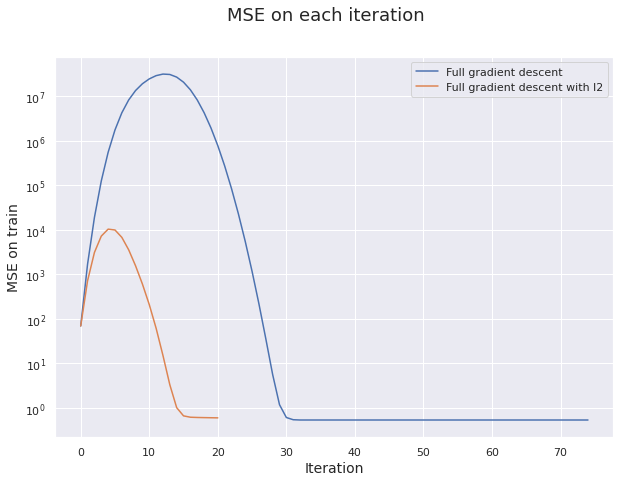

In [668]:
plt.figure(figsize=(10, 7))
plt.suptitle("MSE on each iteration", fontsize=18)
plt.plot(full_history, label="Full gradient descent")
plt.plot(full_history_reg, label="Full gradient descent with l2")
plt.yscale("log")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("MSE on train", fontsize=14)
plt.legend(loc="upper right")
plt.show()

Видим, что с L2 полный градиент сошёлся быстрее, то есть изменение весов было незначительным на тех шагах. Качество обучения вышло примерно одинаковым.

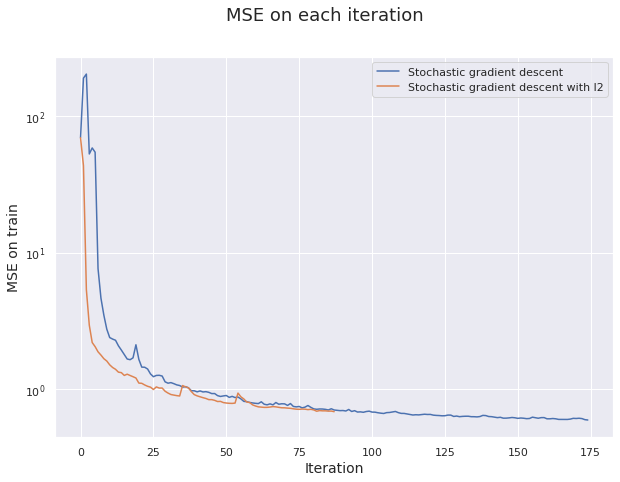

In [681]:
plt.figure(figsize=(10, 7))
plt.suptitle("MSE on each iteration", fontsize=18)
plt.plot(chaos_history, label="Stochastic gradient descent")
plt.plot(chaos_history_reg, label="Stochastic gradient descent with l2")
plt.yscale("log")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("MSE on train", fontsize=14)
plt.legend(loc="upper right")
plt.show()

Видим, что опять с регуляризацией схождение было быстрее. Она штрафует за большие веса, поэтому модель старается их быстрее уменьшить, а с какого-то момента становится нечего уменьшать. Опять видим, что качество более менее одинаковое. Градиент стохастический, поэтому результат может менять от запусков, какой-то мог быть более удачным.

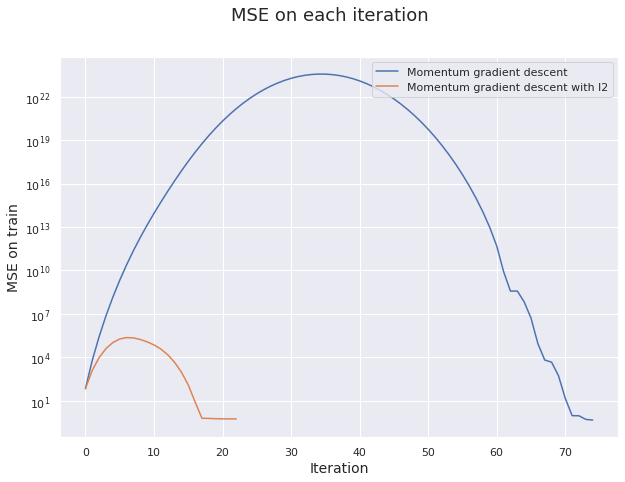

In [682]:
plt.figure(figsize=(10, 7))
plt.suptitle("MSE on each iteration", fontsize=18)
plt.plot(moment_history, label="Momentum gradient descent")
plt.plot(moment_history_reg, label="Momentum gradient descent with l2")
plt.yscale("log")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("MSE on train", fontsize=14)
plt.legend(loc="upper right")
plt.show()

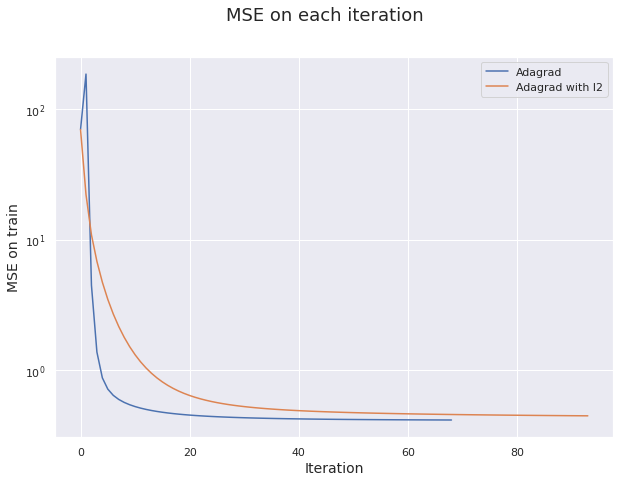

In [683]:
plt.figure(figsize=(10, 7))
plt.suptitle("MSE on each iteration", fontsize=18)
plt.plot(adagrad_history, label="Adagrad")
plt.plot(adagrad_history_reg, label="Adagrad with l2")
plt.yscale("log")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("MSE on train", fontsize=14)
plt.legend(loc="upper right")
plt.show()

В итоге, какие выводы можно сделать, смотря на результаты и эти графики:
1. Гиперпараметры нужно подбирать очень осторожно, так как от них сильно зависит качество обучения и его длительность.
2. На данных примерах с регуляризацией схождение происходило быстрее. Как я предполагаю, это из-за её конструкции, модель быстрее уменьшала какие-то веса, а также сам градиент был больше, а в какой-то момент ей уже было невыгодно уменьшать веса, потому что за это был бы больше штраф, поэтому схождение ускорялось. 
3. Качество с регуляризацией может быть хуже, потому что модель не может подобрать большие веса, поэтому нужно осторожно подбирать мю, а также искать компромисс между переобучением и качеством обучения на трейне.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

Будем реализовывать по этому алгоритму.

<img src="https://sun9-5.userapi.com/Cwvnc4cWUqSU_hGSauG2dzll4lQFhzK3RyWIcA/_MKgAUy1w4Q.jpg" width="700" height="700">

In [787]:
%autoreload 2

from utils import (
    StochasticAverageGradient
)

In [832]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [833]:
lambdas = [0.008, 0.010, 0.013, 0.015, 0.018, 0.021]
results = []
for lambda_ in lambdas:
    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
        descent=StochasticAverageGradient(x_shape=len(X_train), lambda_=lambda_, w0=w0)
    )
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_valid)
    results.append(mean_squared_error(y_pred, y_valid, squared=True))

Text(0, 0.5, 'MSE on valid')

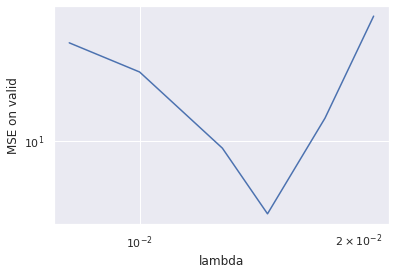

In [834]:
plt.plot(lambdas, results)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("lambda")
plt.ylabel("MSE on valid")

In [836]:
best_lambda = lambdas[np.argmin(results)]

В общем результат не очень радует, потому что очень маленький диапазон лямбд, на которых ошибка относительно небольшая, если взять больше или меньше, то ошибка сильно увеличивается.

In [838]:
y_train = np.concatenate([y_train, y_valid])
X_train = np.concatenate([X_train, X_valid])

In [839]:
w0 = np.zeros(X_train.shape[1])
regression = LinearRegression(descent=StochasticAverageGradient(x_shape=len(X_train), lambda_=best_lambda, w0=w0))
regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_pred = regression.predict(X_test)
print("Train MSE = %.4f" % mean_squared_error(y_train_pred, y_train, squared=True))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))
print("Number of iterations: %d" % len(regression.loss_history))
sag_history = regression.loss_history

Train MSE = 3.5111
Test MSE = 3.5419
Train R^2 = -1.7209
Test R^2 = -1.7254
Number of iterations: 102


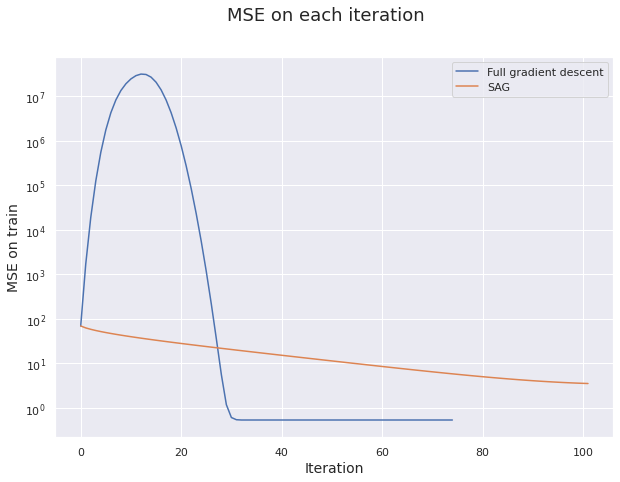

In [840]:
plt.figure(figsize=(10, 7))
plt.suptitle("MSE on each iteration", fontsize=18)
plt.plot(full_history, label="Full gradient descent")
plt.plot(sag_history, label="SAG")
plt.yscale("log")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("MSE on train", fontsize=14)
plt.legend(loc="upper right")
plt.show()

**Итоги:** в общем, SAG работает не так хорошо, как я ожидал. Как мы видим, требуется достаточно много итераций, причём если сравнивать по другим лямбдам, то он вообще часто не сходится и уходит от оптимальной точки далеко. Алгоритм, конечно, интересный, но при этом приходится хранить много градиентов.

Я думаю, что дело в том, что у меня сильно разреженные данные: много колонок с бинарными признаками, поэтому когда они выпадают, происходит незначительное изменение градиента. В принципе, анализ показал, что для этих данных работает хорошо адаград, как говорилось на лекции. SAG похож на стохастический тем, что для обновления градиента использует только 1 объект за итерацию (в данной реализации), а стохастический как раз плохо работает на разреженных данных.